# Creating a Logistic Regression Model to Predict Breast Cancer Recurrence

# Import software libraries and load the dataset

In [1]:
# Import required libraries
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib as mpl               # Create 2D charts
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sns                  # Perform data visualization

import matplotlib.pyplot as plt
# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(mpl.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

# Read the raw dataset based on data from https://archive.ics.uci.edu/ml/datasets/breast+cancer
print('------------------------------------')
print('Loading the dataset.')
#PROJECT_ROOT_DIR = '.'
#DATA_PATH = os.path.join(PROJECT_ROOT_DIR, 'breast_cancer_data')
#print('Data files in this project:', os.listdir(DATA_PATH) )
#data_raw_file = os.path.join( DATA_PATH, 'breast-cancer.csv' )
df = pd.read_csv("breast-cancer.csv")
print('Loaded {} records\n'.format(len(df)))

Libraries used in this project:
- NumPy 1.19.2
- Pandas 1.1.3
- Matplotlib 3.3.2
- SciPy 1.5.2
- Scikit-learn 0.23.2
- Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]

------------------------------------
Loading the dataset.
Loaded 286 records



# Get acquainted with the data structure and preview the records

In [2]:
# Show the various features and their data types


# View the first five records


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   recurrence    286 non-null    int64
 1   age_decade    286 non-null    int64
 2   meno_pre      286 non-null    int64
 3   meno_lt_40    286 non-null    int64
 4   meno_ge_40    286 non-null    int64
 5   tumor_size    286 non-null    int64
 6   inv_nodes     286 non-null    int64
 7   node_caps     286 non-null    int64
 8   deg_malig     286 non-null    int64
 9   breast_left   286 non-null    int64
 10  breast_right  286 non-null    int64
 11  irradiat      286 non-null    int64
dtypes: int64(12)
memory usage: 26.9 KB


In [4]:
df.head()

,recurrence,age_decade,meno_pre,meno_lt_40,meno_ge_40,tumor_size,inv_nodes,node_caps,deg_malig,breast_left,breast_right,irradiat
0,0,30,1,0,0,32,1,0,3,1,0,0
1,0,40,1,0,0,42,1,0,2,0,1,0
2,0,40,1,0,0,42,1,0,2,1,0,0
3,0,60,0,0,1,62,1,0,2,0,1,0
4,0,40,1,0,0,42,1,0,2,0,1,0


In [5]:
df["recurrence"].value_counts()

0    201
1     85
Name: recurrence, dtype: int64

# Examine descriptive statistics

In [6]:
# Show descriptive statistics

df.describe()

,recurrence,age_decade,meno_pre,meno_lt_40,meno_ge_40,tumor_size,inv_nodes,node_caps,deg_malig,breast_left,breast_right,irradiat
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.297203,46.643357,0.524476,0.024476,0.451049,48.643357,2.573427,0.223776,2.048951,0.531469,0.468531,0.237762
std,0.457828,10.118183,0.500276,0.154791,0.498470,10.118183,3.451904,0.417504,0.738217,0.499883,0.499883,0.426459
min,0.000000,20.000000,0.000000,0.000000,0.000000,22.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,0.000000,42.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,1.000000,0.000000,0.000000,52.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
75%,1.000000,50.000000,1.000000,0.000000,1.000000,52.000000,4.000000,0.000000,3.000000,1.000000,1.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,1.000000,72.000000,25.000000,1.000000,3.000000,1.000000,1.000000,1.000000


# Use histograms to visualize the distribution of various features

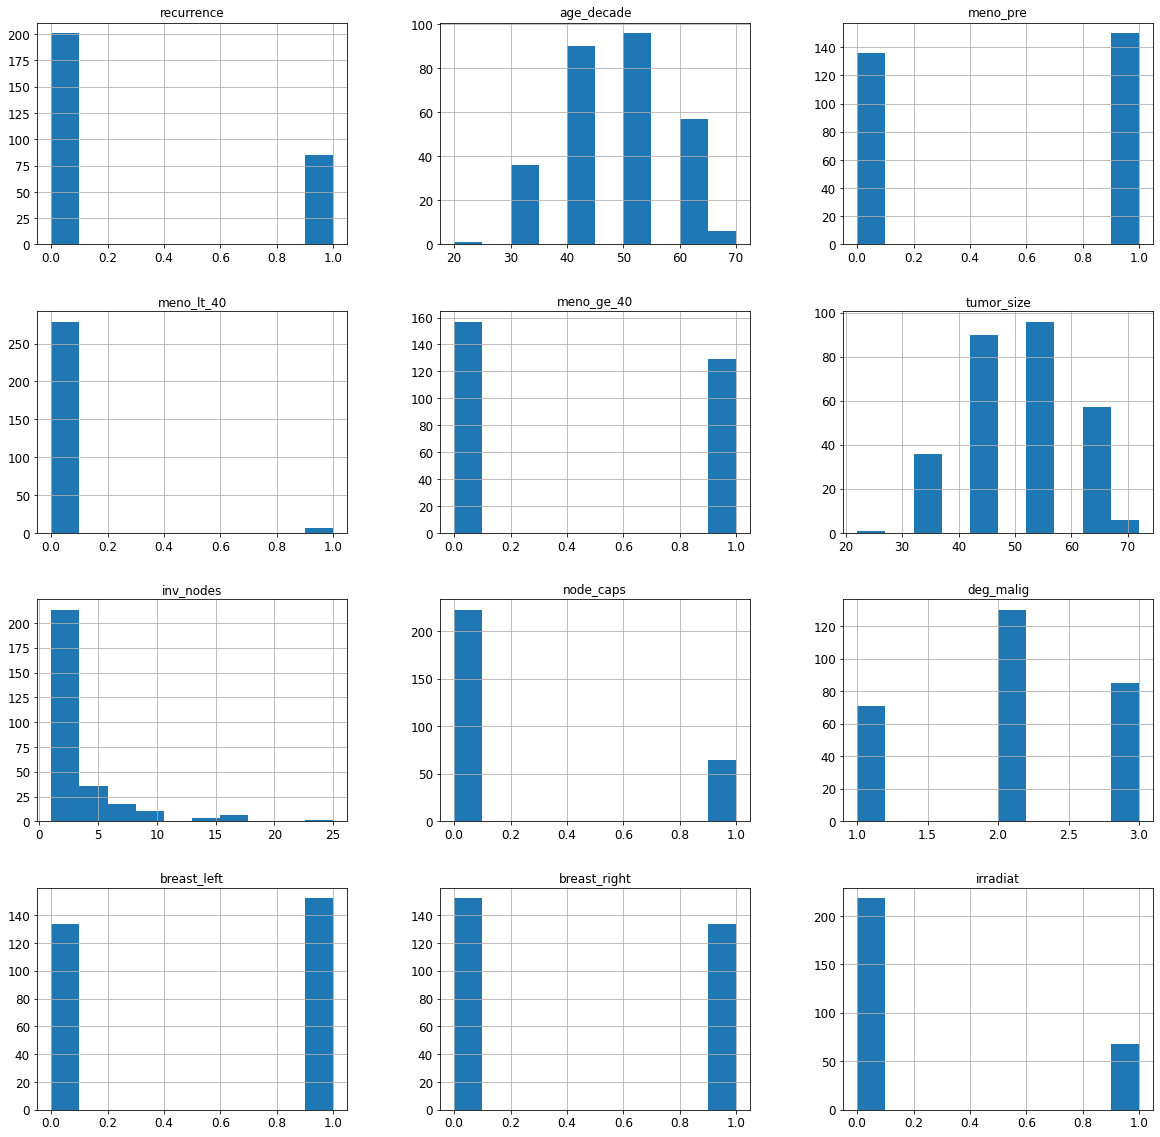

In [7]:
# Show histograms for each attribute in the dataset

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(figsize=(20,20))
plt.show()

# Split the data into training and validation sets and labels

In [8]:
# Import a function to split the dataset

from sklearn.model_selection import train_test_split


# Specify the column to be included in the label set ('recurrence')

X = df.iloc[:,1:]
y = df.iloc[:,0]

# Specify columns to be included in the training and validation sets (all other columns)


# Split the training set, validation set, and labels for both
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state = 0, stratify=y)

# Compare the number of rows and columns in the original data to the training and validation sets

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((214, 11), (214,), (72, 11), (72,))

In [9]:
# Preview the training data

X_train

array([[30,  1,  0, ...,  1,  0,  0],
       [40,  1,  0, ...,  1,  0,  0],
       [50,  0,  0, ...,  1,  0,  1],
       ...,
       [50,  0,  0, ...,  0,  1,  0],
       [30,  1,  0, ...,  0,  1,  1],
       [50,  0,  1, ...,  1,  0,  0]], dtype=int64)

In [10]:
# Preview the labels

y_train

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

# Build the model

In [11]:
# Create a logistic regression model, and use the validation data and labels to score it.

from sklearn.linear_model import LogisticRegressionCV

logistic = LogisticRegressionCV(random_state=0, cv=5, scoring="f1", max_iter=1000)

In [12]:
logistic.fit(X_train,y_train)

LogisticRegressionCV(cv=5, max_iter=1000, random_state=0, scoring='f1')

In [13]:
logistic_pred = logistic.predict(X_test)

In [14]:
logistic_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

# Test the model

In [15]:
# Add columns to a copy of the test data to compare predictions against actual values.

table = pd.DataFrame(X_test.copy())

# View examples of the predictions compared to actual recurrence.


In [16]:
table["Actual Recurrence"] = y_test.copy()

In [17]:
table["Predicted Recurrence"] = logistic_pred

In [18]:
table

,0,1,2,3,4,5,6,7,8,9,10,Actual Recurrence,Predicted Recurrence
0,30,1,0,0,32,4,1,3,1,0,1,1,1
1,60,0,0,1,62,1,0,1,1,0,0,0,0
2,30,1,0,0,32,1,0,3,1,0,0,1,0
3,40,1,0,0,42,1,0,2,1,0,0,0,0
4,30,1,0,0,32,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,60,0,0,1,62,7,1,2,0,1,0,0,0
68,60,0,0,1,62,1,0,1,0,1,1,1,0
69,40,1,0,0,42,7,1,3,0,1,0,1,1
70,40,1,0,0,42,1,0,2,1,0,0,0,0


In [19]:
from sklearn.metrics import roc_auc_score, classification_report

In [20]:
roc_auc_score(y_test,logistic_pred)

0.6078431372549019

In [21]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        51
           1       0.54      0.33      0.41        21

    accuracy                           0.72        72
   macro avg       0.65      0.61      0.61        72
weighted avg       0.70      0.72      0.70        72

